<h3>DESPESAS DA PREFEITURA DE SÃO JOSÉ DOS CAMPOS(JANEIRO/2017 - MAIO/2018)</h3>

<p><b>Aluna:</b> Aline Dominique da Silva Santos<br>
<b>Matéria:</b> Inteligência Artificial<br>
<b>Prof.:</b> Fernando Massanori<br>
<b>FATEC São José dos Campos - Prof. Jessen Vidal</b><br>
Analise das Despesas da Prefeitura de São José dos Campos com os dados encontrados no Portal de Transparência: http:servicos2.sjc.sp.gov.brservicosportal_da_transparencia.aspx'</p>

<ol>
    <li>Organizando e Informações do Dataframe </li>
    <li>Analise dos Recursos da Prefeitura</li>
    <li>Analise dos Estágios das Despesas da Prefeitura</li>
    <ol><li>Comparativo dos Estágios das Despesas: Semestres</li></ol>
    <li>Analise da Natureza das Despesas</li>
    <li>Analise das Despesas por Secretária</li><ol>
        <li>Analise das Despesas das Secretárias por mês</li>
        <li>Analise das Despesas das Secretárias: Função</li>
        <li>Analise das Despesas das Secretarias: Natureza</li>
        <li>Analise das Secretarias: Recursos</li>
        <li>Analise das Despesas das Secretarias: Subfunção</li>
    </ol>
</ol>

<h4>1. Organizando e Informações do Dataframe</h4>

<p>Importações de Bibliotecas que serão usadas nesta analise</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<p>Variável e Leitura de arquivos</p>

In [2]:
janeiro2017 = pd.read_csv('./DespesaFuncaoJaneiro2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
fevereiro2017 = pd.read_csv('./DespesaFuncaoFevereiro2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
marco2017 = pd.read_csv('./DespesaFuncaoMarco2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
abril2017 = pd.read_csv('./DespesaFuncaoAbril2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
maio2017 = pd.read_csv('./DespesaFuncaoMaio2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
junho2017 = pd.read_csv('./DespesaFuncaoJunho2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
julho2017 = pd.read_csv('./DespesaFuncaoJulho2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
agosto2017 = pd.read_csv('./DespesaFuncaoAgosto2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
setembro2017 = pd.read_csv('./DespesaFuncaoSetembro2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
outubro2017 = pd.read_csv('./DespesaFuncaoOutubro2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
novembro2017 = pd.read_csv('./DespesaFuncaoNovembro2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
dezembro2017 = pd.read_csv('./DespesaFuncaoDezembro2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
janeiro2018 = pd.read_csv('./DespesaFuncaoJaneiro2018.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
fevereiro2018 = pd.read_csv('./DespesaFuncaoFevereiro2018.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
marco2018 = pd.read_csv('./DespesaFuncaoMarco2018.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
abril2018 = pd.read_csv('./DespesaFuncaoAbril2018.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
maio2018 = pd.read_csv('./DespesaFuncaoMaio2018.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')
junho2018 = pd.read_csv('./DespesaFuncaoJunho2018.csv', sep=';', encoding='ISO-8859-1', low_memory=False,decimal=',')


<p>Concatenei os arquivos </p>

In [3]:
total = pd.concat([janeiro2017,fevereiro2017,marco2017,abril2017,maio2017,junho2017,julho2017,agosto2017,setembro2017,outubro2017,novembro2017,dezembro2017,janeiro2018,fevereiro2018,marco2018,abril2018,maio2018,junho2018])
primeiro_semestre_2017 = pd.concat([janeiro2017,fevereiro2017,marco2017,abril2017,maio2017,junho2017])
segundo_semestre_2017 = pd.concat([julho2017,agosto2017,setembro2017,outubro2017,novembro2017,dezembro2017])
primeiro_semestre_2018 = pd.concat([janeiro2018,fevereiro2018,marco2018,abril2018,maio2018,junho2018])

In [4]:
primeiro_semestre_2018.shape

(1651, 11)

<p>Vizualizei as colunas para depois renome-las</p>

In [5]:
total.columns


Index(['Ano', 'Mês', 'Classificação orçamentária', 'Secretaria', 'Função',
       'Subfunção', 'Natureza da despesa', 'Fonte de recurso',
       'Empenhado (R$)', 'Liquidado  (R$)', 'Pago  (R$)'],
      dtype='object')

In [6]:
total.rename(columns={'Ano': 'ANO',
                      'Mês': 'MES', 
                      'Classificação orçamentária':'CLASSIFICACAOORÇAMENTARIA',
                      'Secretaria':'SECRETARIA', 'Função':'FUNCAO',
                      'Subfunção':'SUBFUNCAO',
                      'Natureza da despesa':'NATUREZADADESPESA',
                      'Fonte de recurso':'FONTEDERECURSO',
                      'Empenhado (R$)':'EMPENHADO(R$)', 
                      'Liquidado  (R$)':'LIQUIDADO(R$)', 
                      'Pago  (R$)':'PAGO(R$)'
                  }, inplace=True)
primeiro_semestre_2017.rename(columns={'Ano': 'ANO',
                      'Mês': 'MES', 
                      'Classificação orçamentária':'CLASSIFICACAOORÇAMENTARIA',
                      'Secretaria':'SECRETARIA', 'Função':'FUNCAO',
                      'Subfunção':'SUBFUNCAO',
                      'Natureza da despesa':'NATUREZADADESPESA',
                      'Fonte de recurso':'FONTEDERECURSO',
                      'Empenhado (R$)':'EMPENHADO(R$)', 
                      'Liquidado  (R$)':'LIQUIDADO(R$)', 
                      'Pago  (R$)':'PAGO(R$)'
                  }, inplace=True)

segundo_semestre_2017.rename(columns={'Ano': 'ANO',
                      'Mês': 'MES', 
                      'Classificação orçamentária':'CLASSIFICACAOORÇAMENTARIA',
                      'Secretaria':'SECRETARIA', 'Função':'FUNCAO',
                      'Subfunção':'SUBFUNCAO',
                      'Natureza da despesa':'NATUREZADADESPESA',
                      'Fonte de recurso':'FONTEDERECURSO',
                      'Empenhado (R$)':'EMPENHADO(R$)', 
                      'Liquidado  (R$)':'LIQUIDADO(R$)', 
                      'Pago  (R$)':'PAGO(R$)'
                  }, inplace=True)
primeiro_semestre_2018.rename(columns={'Ano': 'ANO',
                      'Mês': 'MES', 
                      'Classificação orçamentária':'CLASSIFICACAOORÇAMENTARIA',
                      'Secretaria':'SECRETARIA', 'Função':'FUNCAO',
                      'Subfunção':'SUBFUNCAO',
                      'Natureza da despesa':'NATUREZADADESPESA',
                      'Fonte de recurso':'FONTEDERECURSO',
                      'Empenhado (R$)':'EMPENHADO(R$)', 
                      'Liquidado  (R$)':'LIQUIDADO(R$)', 
                      'Pago  (R$)':'PAGO(R$)'
                  }, inplace=True)

In [7]:
total.columns


Index(['ANO', 'MES', 'CLASSIFICACAOORÇAMENTARIA', 'SECRETARIA', 'FUNCAO',
       'SUBFUNCAO', 'NATUREZADADESPESA', 'FONTEDERECURSO', 'EMPENHADO(R$)',
       'LIQUIDADO(R$)', 'PAGO(R$)'],
      dtype='object')

<p>Visualização das 20 linhas da Tabela</p>

In [8]:
total.head(20)

,ANO,MES,CLASSIFICACAOORÇAMENTARIA,SECRETARIA,FUNCAO,SUBFUNCAO,NATUREZADADESPESA,FONTEDERECURSO,EMPENHADO(R$),LIQUIDADO(R$),PAGO(R$)
0,2017,1,05.10.3.1.90.11.04.122.0002.2.002.01.110000,GABINETE DO PREFEITO,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL,TESOURO,255525.22,255525.22,255525.22
1,2017,1,05.10.3.1.90.16.04.122.0002.2.002.01.110000,GABINETE DO PREFEITO,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,OUTRAS DESPESAS VARIÁVEIS - PESSOAL CIVIL,TESOURO,7287.43,7287.43,7287.43
2,2017,1,05.10.3.3.90.36.04.122.0002.2.002.01.110000,GABINETE DO PREFEITO,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,OUTROS SERVIÇOS DE TERCEIROS - PESSOA FÍSICA,TESOURO,8482.01,8482.01,8482.01
3,2017,1,05.10.3.3.90.39.04.122.0002.2.002.01.110000,GABINETE DO PREFEITO,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,TESOURO,7200.00,0.00,0.00
4,2017,1,05.20.3.3.90.39.04.122.0002.2.005.01.110000,GABINETE DO PREFEITO,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,TESOURO,8290.00,0.00,0.00
5,2017,1,10.10.3.1.90.11.04.122.0006.2.002.01.110000,SECRETARIA DE GOVERNANÇA,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL,TESOURO,105171.89,105171.89,105171.89
6,2017,1,10.10.3.1.90.16.04.122.0006.2.002.01.110000,SECRETARIA DE GOVERNANÇA,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,OUTRAS DESPESAS VARIÁVEIS - PESSOAL CIVIL,TESOURO,2872.35,2872.35,2872.35
7,2017,1,10.10.3.3.90.30.04.122.0006.2.002.01.110000,SECRETARIA DE GOVERNANÇA,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,MATERIAL DE CONSUMO,TESOURO,20200.00,0.00,0.00
8,2017,1,10.10.3.3.90.36.04.122.0006.2.002.01.110000,SECRETARIA DE GOVERNANÇA,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,OUTROS SERVIÇOS DE TERCEIROS - PESSOA FÍSICA,TESOURO,4660.00,4660.00,4660.00
9,2017,1,10.10.3.3.90.39.04.122.0006.2.002.01.110000,SECRETARIA DE GOVERNANÇA,ADMINISTRAÇÃO,ADMINISTRAÇÃO GERAL,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,TESOURO,3580.80,0.00,0.00


<h4>2. Analise dos Recursos da Prefeitura</h4>
<p>A maior parte dos Recursos usados para o pagamento das despesas é do Tesouro como mostra o gáfico abaixo:</p>

TESOURO                                                                   4582
TRANSFERENCIAS E CONVENIOS FEDERAIS - VINCULADOS                           805
TRANSFERENCIAS E CONVENIOS ESTADUAIS - VINCULADOS                          560
RECURSOS PROPRIOS DE FUNDOS ESPECIAIS DE DESPESA - VINCULADOS              251
OPERAÇÕES DE CREDITO                                                        36
OUTRAS FONTES DE RECURSOS                                                   18
TRANSFERENCIAS E CONVENIOS ESTADUAIS - VINCULADOS - EXERCÍCIO ANTERIOR       6
Name: FONTEDERECURSO, dtype: int64


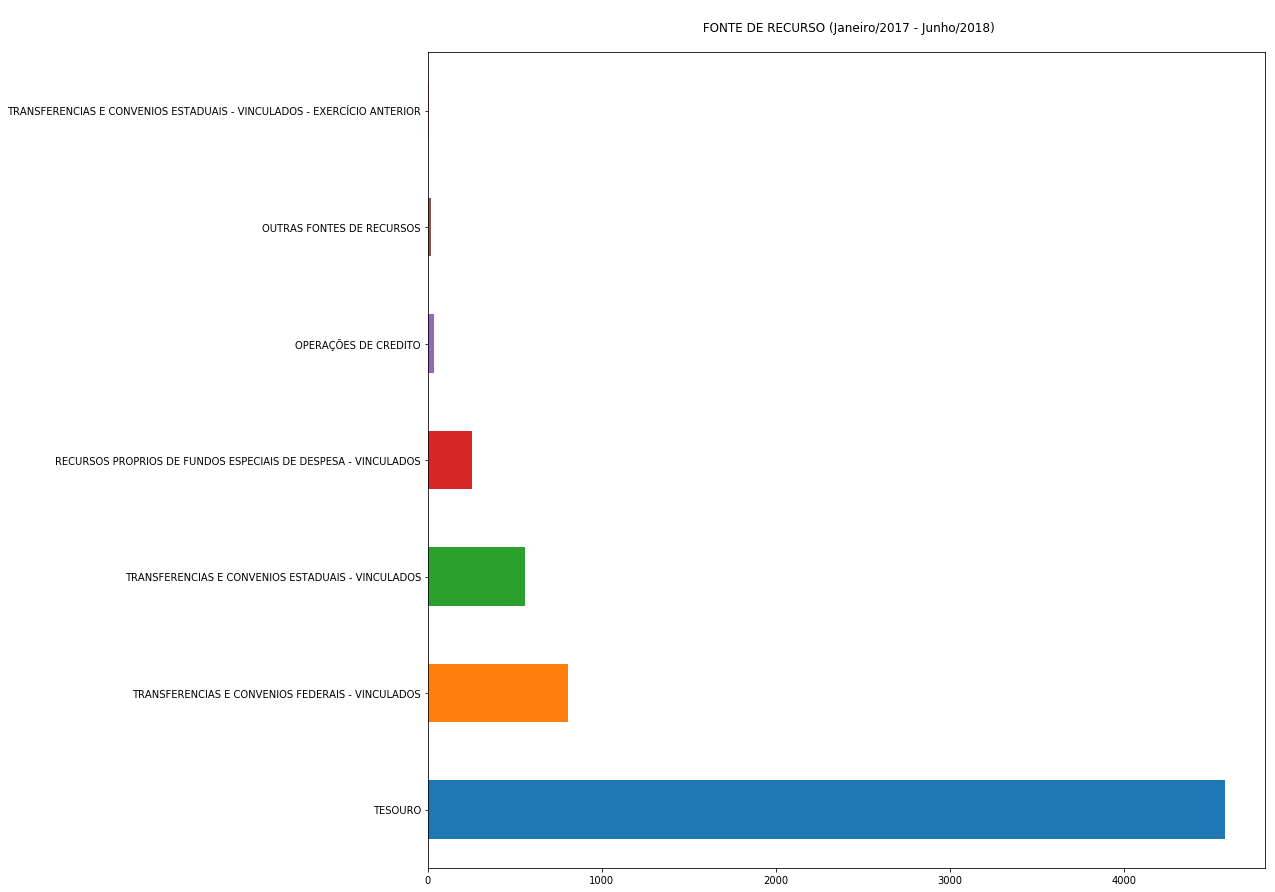

In [9]:
cont_rec=total['FONTEDERECURSO'].value_counts()
print(cont_rec)
fig, axes = plt.subplots()  
cont_rec.plot.barh(ax = axes, figsize=(15,15),
                        title=('\n FONTE DE RECURSO (Janeiro/2017 - Junho/2018)\n'))

<p>Criei um gráfico de Pizza com a porcentagem da fonte dos recursos, para se visualizar quanto de cada fonte compõe os valores arrecados para realizar o pagamento das despesas.<br>
Como alguns valores eram muito pequenos, eu somei para ficar melhor representado no gráfico.O comentário mostra os valores que juntei.</p>

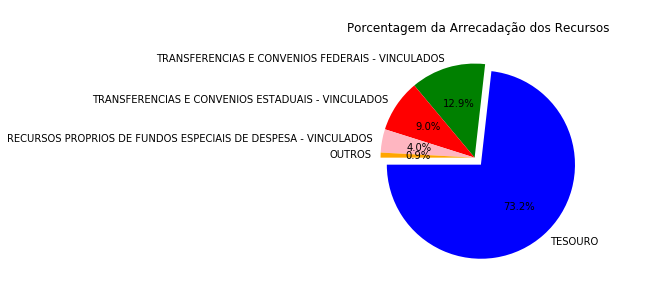

In [10]:
#Outros = OPERAÇÕES DE CREDITO + OUTRAS FONTES DE RECURSOS
# TRANSFERENCIAS E CONVENIOS ESTADUAIS - VINCULADOS = 'TRANSFERENCIAS E CONVENIOS ESTADUAIS - VINCULADOS + TRANSFERENCIAS E CONVENIOS ESTADUAIS - VINCULADOS - EXERCÍCIO ANTERIOR 
labels = ['TESOURO','TRANSFERENCIAS E CONVENIOS FEDERAIS - VINCULADOS','TRANSFERENCIAS E CONVENIOS ESTADUAIS - VINCULADOS',
          'RECURSOS PROPRIOS DE FUNDOS ESPECIAIS DE DESPESA - VINCULADOS','OUTROS']
recursos = [4582,805,566,251,54]
cores = ['blue', 'green', 'red', 'lightpink','orange']
explode = (0.1, 0, 0, 0, 0)
plt.title('\nPorcentagem da Arrecadação dos Recursos\n')
plt.pie(recursos, explode=explode, labels=labels, colors=cores, autopct='%1.1f%%', startangle=180)
plt.axis('equal') 
plt.show()

<h4>3. Analise dos Estágios das Despesas da Prefeitura</h4>
<h6>Breve explicação sobre os estágios das despesas públicas</h6>
<p>Empenhado é o valor que o orgão público reserva para efetuar um pagamento planejado, podendo ocorrer após a assinatura de um contrato de prestação de serviço por exemplo.
Quando cada serviço for executado o valor é Liquidado, e quando o prestador de serviço receber o valor do serviço concluído este é considerado o valor Pago.<br>
<b>Fonte: Tesouro Nacional<b></p>

In [11]:
pg=round(total['PAGO(R$)'].sum(),2)
print("Total Pago: ",pg)
emp=round(total['EMPENHADO(R$)'].sum(),2)
print("Total Empenhado: ",emp)
liq=round(total['LIQUIDADO(R$)'].sum(),2)
print("Total Liquidado: ",liq)
dif=round(liq-pg,2)
print("Total á Pagar: ",dif)
dif2=round(emp-liq,2)
print("Total á Executar: ",dif2 )

Total Pago:  2487601179.57
Total Empenhado:  3205549383.42
Total Liquidado:  2570264065.98
Total á Pagar:  82662886.41
Total á Executar:  635285317.44


<p>No gáfico abaixo mostra os valores totais de cada estágio das Despesas da <b>Prefeitura São José dos Campos</b>, e a diferença entre o que falta ser executado e pagamento ao fornecedor.<br>
No gráfico de Pizza em porcentagem o estágio das despesas.</p>

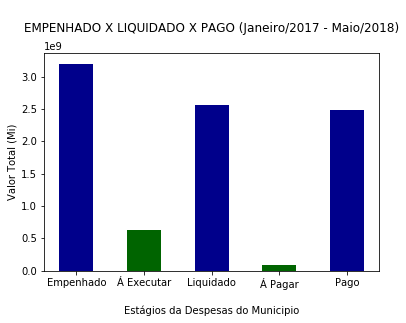

In [12]:
y_axis = [emp,dif2,liq,dif,pg]
y_axis1=[dif2,dif]
x_axis = range(len(y_axis))
width_n = 0.5

plt.xlabel('\nEstágios da Despesas do Municipio')
plt.ylabel('Valor Total (Mi)')
plt.title('\nEMPENHADO X LIQUIDADO X PAGO (Janeiro/2017 - Maio/2018)\n')
plt.bar(['Empenhado','Á Executar','Liquidado','Á Pagar','Pago'], y_axis, width=width_n, color='darkblue' ,align='center')
plt.bar(['Á Executar','Á Pagar'],y_axis1,width=width_n,color='darkgreen')
plt.show()


<p>Este gráfico em formato mostra em porcentagem do quanto da despesa já foi liquidada e paga</p>

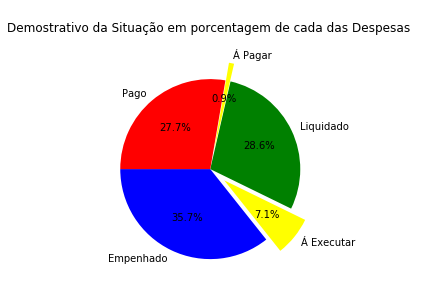

In [13]:
labels = ['Empenhado','Á Executar','Liquidado','Á Pagar','Pago']
valores = [emp,dif2,liq,dif,pg]
cores = ['blue', 'yellow','green', 'yellow','red']
explode = (0, 0.2, 0, 0.2, 0)
plt.title('\nDemostrativo da Situação em porcentagem de cada das Despesas  \n')
plt.pie(valores, explode=explode, labels=labels, colors=cores, autopct='%1.1f%%', startangle=180)
plt.axis('equal') 
plt.show()

<h5>A. Comparativo dos Estágios das Despesas: Semestres</h5>
<p>Nas proximas linhas Alguns comparativos os semestres.</p>

In [14]:
#primeiro_semestre_2017
print('1º Semestre de 2017')
pg1=round(primeiro_semestre_2017['PAGO(R$)'].sum(),2)
print("Total Pago: ",pg1)
emp1=round(primeiro_semestre_2017['EMPENHADO(R$)'].sum(),2)
print("Total Empenhado: ",emp1)
liq1=round(primeiro_semestre_2017['LIQUIDADO(R$)'].sum(),2)
print("Total Liquidado: ",liq1)
apag1=round(liq1-pg1,2)
print("Total á Pagar: ",apag1)
aexe1=round(emp1-liq1,2)
print("Total á Executar: ",aexe1 )
print('\n')

#segundo_semestre_2017
print('2º Semestre de 2017')
pg2=round(segundo_semestre_2017['PAGO(R$)'].sum(),2)
print("Total Pago: ",pg2)
emp2=round(segundo_semestre_2017['EMPENHADO(R$)'].sum(),2)
print("Total Empenhado: ",emp2)
liq2=round(segundo_semestre_2017['LIQUIDADO(R$)'].sum(),2)
print("Total Liquidado: ",liq2)
apag2=round(liq2-pg2,2)
print("Total á Pagar: ",apag2)
aexe2=round(liq2-emp2,2)
print("Total á Executar: ",aexe2)
print('\n')

#primeiro_semestre_2018
print('1º Semestre de 2018')
pg3=round(primeiro_semestre_2018['PAGO(R$)'].sum(),2)
print("Total Pago: ",pg3)
emp3=round(primeiro_semestre_2018['EMPENHADO(R$)'].sum(),2)
print("Total Empenhado: ",emp3)
liq3=round(primeiro_semestre_2018['LIQUIDADO(R$)'].sum(),2)
print("Total Liquidado: ",liq3)
apag3=round(liq3-pg3,2)
print("Total á Pagar: ",apag3)
aexe3=round(emp3-liq3,2)
print("Total á Executar: ",aexe3)

1º Semestre de 2017
Total Pago:  815515966.02
Total Empenhado:  1192360390.34
Total Liquidado:  862058344.86
Total á Pagar:  46542378.84
Total á Executar:  330302045.48


2º Semestre de 2017
Total Pago:  977224486.68
Total Empenhado:  723721073.08
Total Liquidado:  980094108.36
Total á Pagar:  2869621.68
Total á Executar:  256373035.28


1º Semestre de 2018
Total Pago:  694860726.87
Total Empenhado:  1289467920.0
Total Liquidado:  728111612.76
Total á Pagar:  33250885.89
Total á Executar:  561356307.24


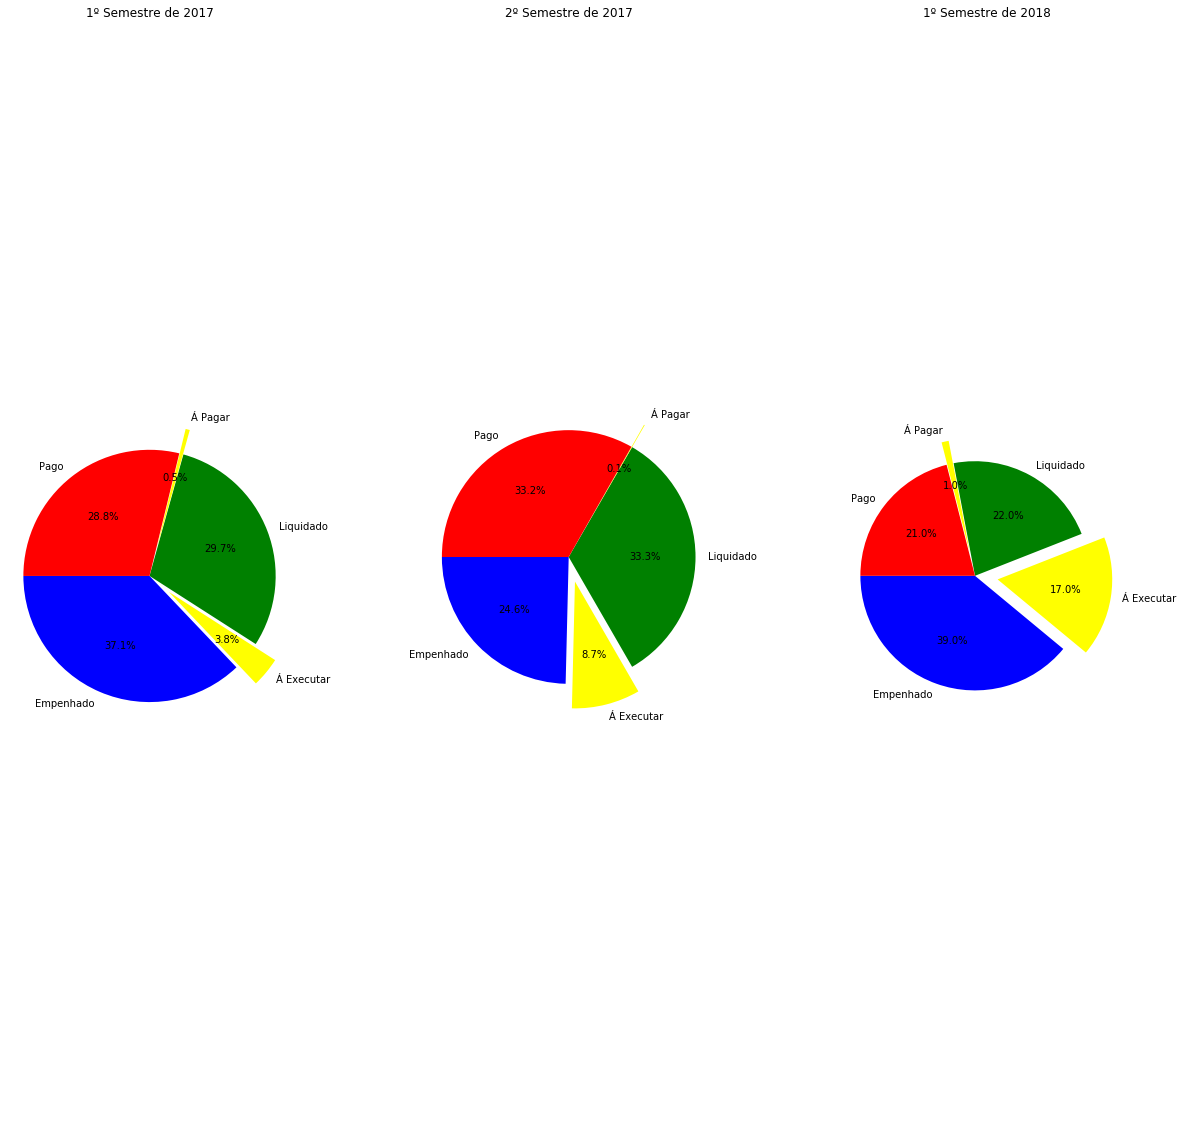

In [15]:
labels = ['Empenhado','Á Executar','Liquidado','Á Pagar','Pago']
cores = ['blue', 'yellow','green', 'yellow','red']
explode = (0, 0.2, 0, 0.2, 0)
fig, eixos = plt.subplots(nrows=1, ncols=3,figsize=(20,20))
pie_1 = eixos[0].pie([emp,aexe1,liq,apag1,pg], explode=explode,labels=labels,
                    autopct='%1.1f%%', colors=cores, startangle=180)
eixos[0].set_title('1º Semestre de 2017')
eixos[0].axis('equal')

pie_2 = eixos[1].pie([emp2,aexe2,liq2,apag2,pg2], explode=explode,labels=labels,
                    autopct='%1.1f%%', colors=cores, startangle=180)
eixos[1].set_title('2º Semestre de 2017')
eixos[1].axis('equal')

pie_3 = eixos[2].pie([emp3,aexe3,liq3,apag3,pg3], explode=explode,labels=labels,
                    autopct='%1.1f%%', colors=cores, startangle=180)
eixos[2].set_title('1º Semestre de 2018')

plt.axis('equal')
plt.subplots_adjust(wspace=0.5)
plt.show()


<h4>4. Analise da Natureza das Despesas</h4>
<p>Variável com a quantidade da Natureza das Despesas e Abaixo um Gráfico com os Valores</p>

In [16]:
num_doc_despesa=total['NATUREZADADESPESA'].value_counts()
print(num_doc_despesa)

OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA                           1781
MATERIAL DE CONSUMO                                                       829
OUTROS SERVIÇOS DE TERCEIROS - PESSOA FÍSICA                              542
VENCIMENTOS E VANTAGENS FIXAS -  PESSOAL CIVIL                            418
OUTRAS DESPESAS VARIÁVEIS - PESSOAL CIVIL                                 300
EQUIPAMENTOS E MATERIAL PERMANENTE                                        264
OBRIGAÇÕES PATRONAIS                                                      230
OBRAS E INSTALAÇÕES                                                       214
OBRIGAÇÕES PATRONAIS - INTRA-ORÇAMENTÁRIO                                 150
OUTROS AUXÍLIOS FINANCEIROS A PESSOA FÍSICA                               149
MATERIAL, BEM OU SERVIÇO PARA DISTRIBUIÇÃO GRATUITA                       149
INDENIZAÇÕES E RESTITUIÇÕES TRABALHISTAS                                  137
AUXÍLIO ALIMENTAÇÃO                                             

VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL:Despesas com vencimentos do servidor público civil com subsídios e com vantagens, cuja temporalidade de pagamento tenha caráter permanente enquanto durar a situação do cargo, função, local e tempo de serviço, inclusive as despesas com abono de férias, 13º salário e as pagas por decisão judicial. (Subsídios, vencimentos e vantagens dos cargos de provimento efetivo e em comissão, gratificação natalina e outros vencimentos e vantagens fixas do pessoal civil).
Fonte: http://www.gestaodinheiropublico.pr.gov.br/Gestao/glossario.jsp#LETRA_V

OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA: Despesas com prestação de serviços executados por pessoas jurídicas tais como adaptação, reparos e conservação de bens móveis, despesas com instalação de equipamento de comunicação, reproduções xerox, impressos e serviços gráficos, passagens, serviços de reparos de veículos, aluguéis para eventos, assinatura de revistas, exposições, conferências e congressos, diferenças de câmbio, etc.
Fonte: http://cnpq.br/view/-/journal_content/56_INSTANCE_0oED/10157/79762


Com os gráficos Natureza da Despesa e Valores Pagos por Natureza da Despesa as seguintes informações são retiradas:
A despesa OUTROS Seviços De Terceiros - Pessoa Jurídica é que mais ocorre na Prefeitura de São José dos Campos e também a que apresenta o maior valor pago.
A despesa Vencimentos e Vantagens Fixas - Pessoa Civil, apesar de ser 4º maior gasto que ocorre na Prefeitura, é a o 2º maior valor pago.



Text(0,0.5,'Natureza das Despesas')

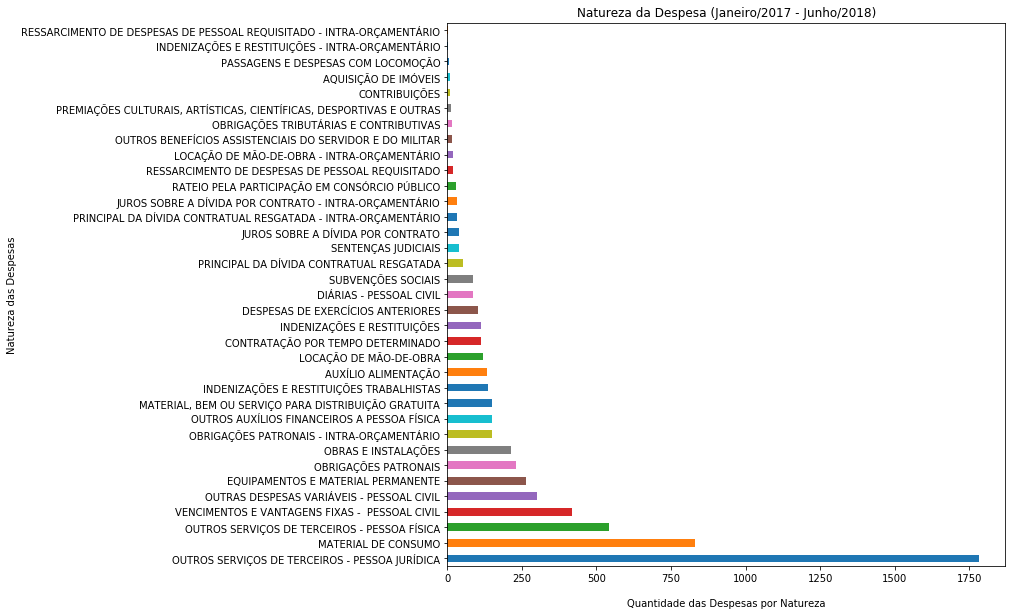

In [17]:
fig, axes = plt.subplots()  
num_doc_despesa.plot.barh(ax = axes, figsize=(10,10),
                        title=('Natureza da Despesa (Janeiro/2017 - Junho/2018)'))
plt.xlabel('\nQuantidade das Despesas por Natureza')
plt.ylabel('Natureza das Despesas')

NATUREZADADESPESA
AQUISIÇÃO DE IMÓVEIS                                                      10424066.6
AUXÍLIO ALIMENTAÇÃO                                                       37096781.5
CONTRATAÇÃO POR TEMPO DETERMINADO                                         39634040.3
CONTRIBUIÇÕES                                                               851154.8
DESPESAS DE EXERCÍCIOS ANTERIORES                                          4497554.2
DIÁRIAS - PESSOAL CIVIL                                                      44371.8
EQUIPAMENTOS E MATERIAL PERMANENTE                                         9279823.8
INDENIZAÇÕES E RESTITUIÇÕES                                               21462132.4
INDENIZAÇÕES E RESTITUIÇÕES - INTRA-ORÇAMENTÁRIO                                 0.0
INDENIZAÇÕES E RESTITUIÇÕES TRABALHISTAS                                  17742506.2
JUROS SOBRE A DÍVIDA POR CONTRATO                                         12885998.1
JUROS SOBRE A DÍVIDA POR CONTRATO - INTRA-ORÇAM

Text(0,0.5,'Natureza das Despesas')

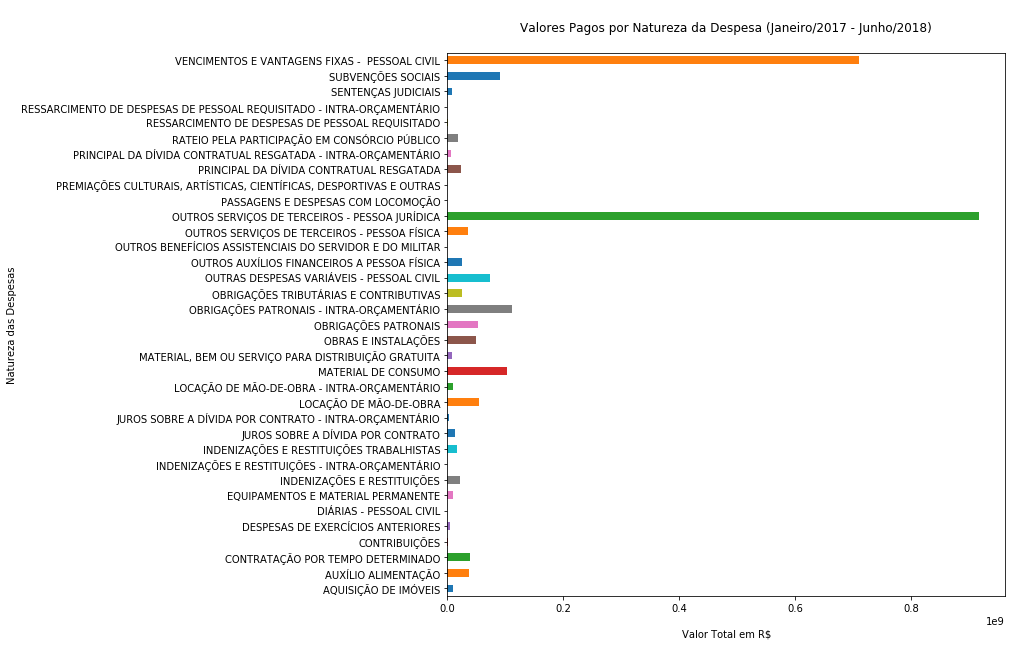

In [18]:
ntd = total.groupby(['NATUREZADADESPESA']).apply(lambda x:round(x['PAGO(R$)'].sum(),1))
print(ntd)
fig, axes = plt.subplots()  
ntd.plot.barh(ax = axes, figsize=(10,10),
                        title=('\nValores Pagos por Natureza da Despesa (Janeiro/2017 - Junho/2018)\n'))
plt.xlabel('\nValor Total em R$')
plt.ylabel('Natureza das Despesas')


<h4>5. Analise das Despesas por Secretária</h4>
<p>No gráfico abaixo mostra as Secretárias com os maiores gastos em reais.</p>

SECRETARIA
ENCARGOS GERAIS DO MUNICÍPIO                          191965017.0
GABINETE DO PREFEITO                                    2242940.8
SECRETARIA DA FAZENDA                                   7651308.0
SECRETARIA DE APOIO JURÍDICO                           16553173.3
SECRETARIA DE APOIO SOCIAL AO CIDADÃO                 100616904.1
SECRETARIA DE EDUCAÇÃO E CIDADANIA                    702139746.7
SECRETARIA DE ESPORTE E QUALIDADE DE VIDA              57372070.2
SECRETARIA DE GESTÃO ADMINISTRATIVA E FINANÇAS         88061891.8
SECRETARIA DE GESTÃO HABITACIONAL E OBRAS              47877137.9
SECRETARIA DE GOVERNANÇA                               34595652.9
SECRETARIA DE HABITAÇÃO                                  505167.7
SECRETARIA DE INOVAÇÃO E DESENVOLVIMENTO ECONÔMICO     16954668.1
SECRETARIA DE MANUTENÇÃO DA CIDADE                    232824846.3
SECRETARIA DE MEIO AMBIENTE                              685269.6
SECRETARIA DE MOBILIDADE URBANA                        60375558.9

Text(0,0.5,'Secretária')

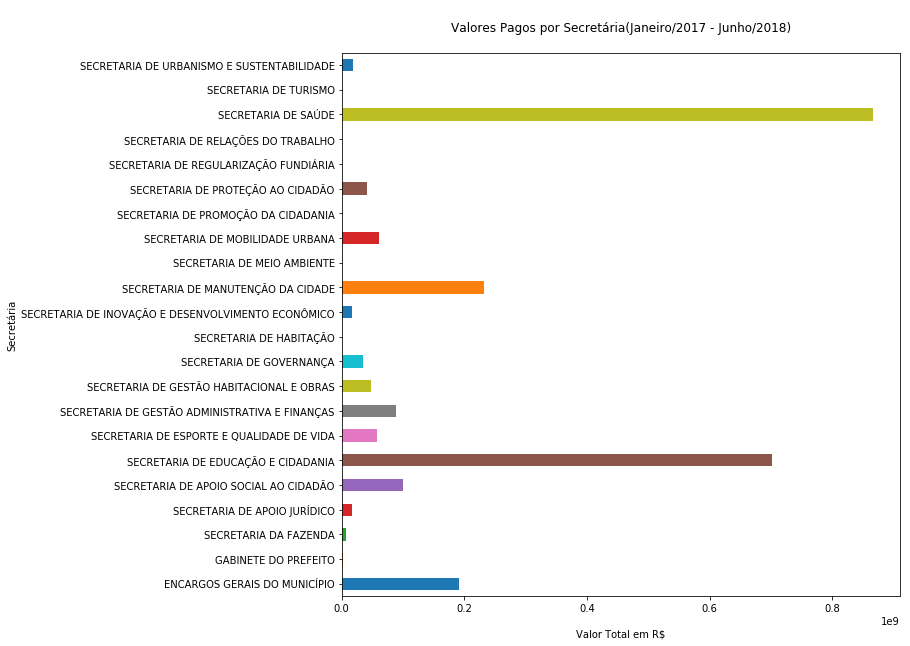

In [19]:
sec = total.groupby(['SECRETARIA']).apply(lambda x: round(x['PAGO(R$)'].sum(),1))
print(sec)
fig, axes = plt.subplots()  
sec.plot.barh(ax = axes, figsize=(10,10),
                        title=('\nValores Pagos por Secretária(Janeiro/2017 - Junho/2018)\n'))
plt.xlabel('\nValor Total em R$')
plt.ylabel('Secretária')

<h5>A. Analise das Despesas das Secretárias por mês</h5>
<p>Os gráficos abaixo foi possível verificar com mais detalhes mês a mês os gastos das Secretarias, como mostrado no gráfico total as secretarias que mais gastam são da Saúde, Educação e Cidadania, Manutenção da Cidade e Encargos Gerais Do Munícipio.</p>

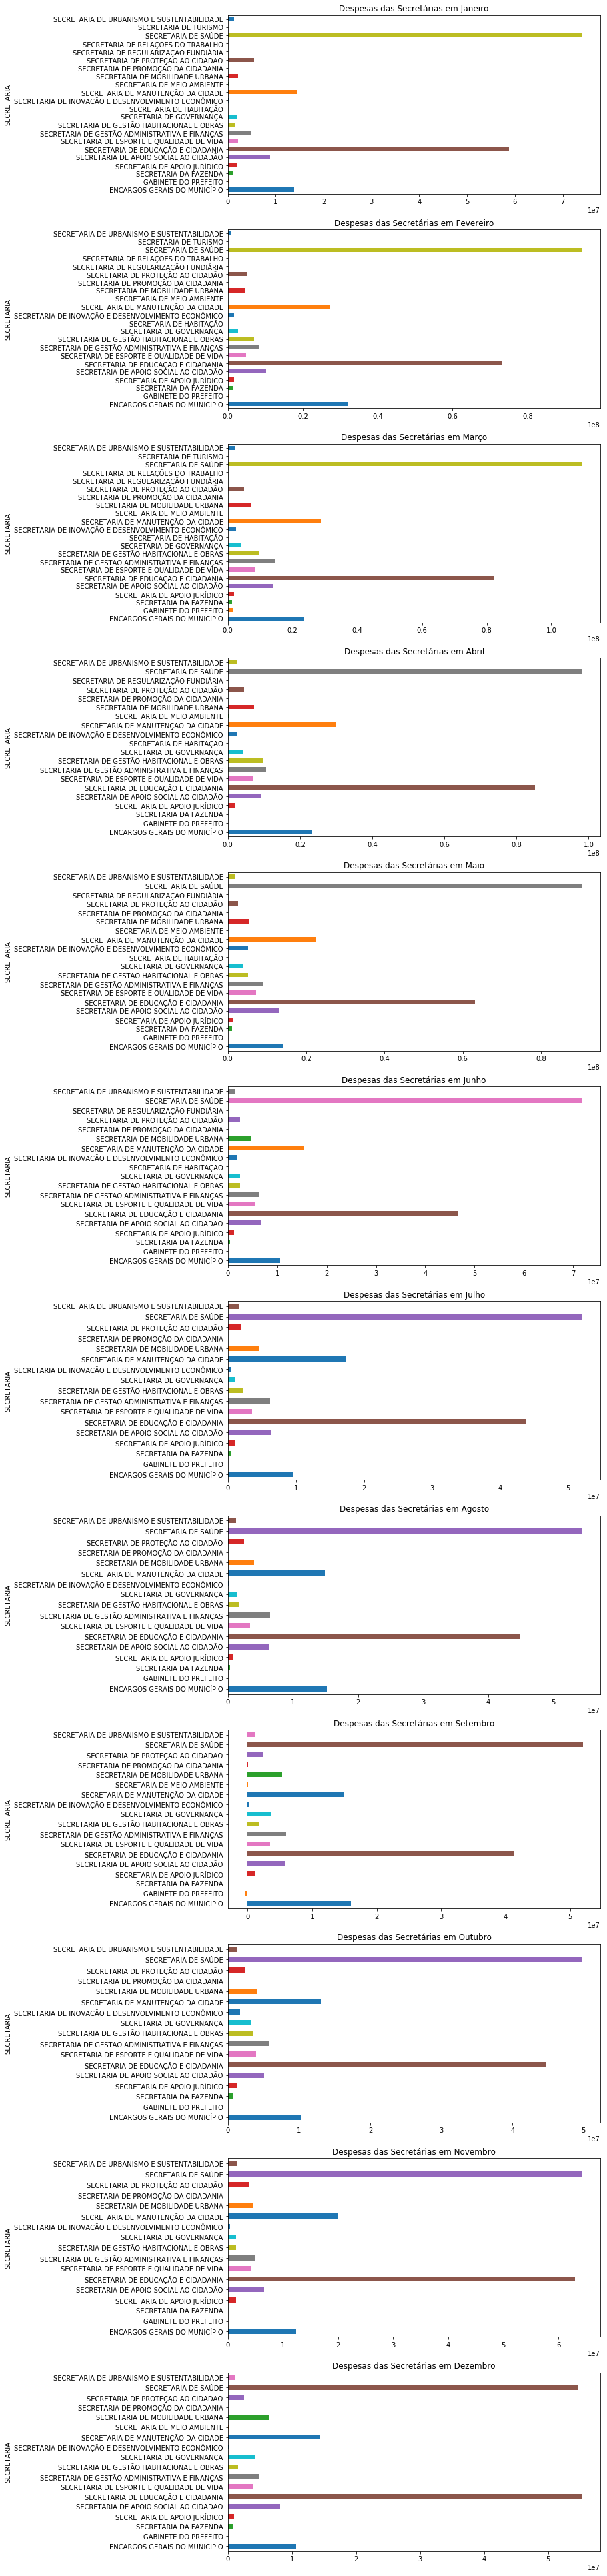

In [20]:
ano2017 = total.groupby(['MES','SECRETARIA']).apply(lambda x: x['PAGO(R$)'].sum())
ano2017.head()
fig, axes = plt.subplots(nrows=12, ncols=1)
mes = 'Janeiro Fevereiro Março Abril Maio Junho Julho Agosto Setembro Outubro Novembro Dezembro'.split()
for x in range(12):
    ano2017[x+1].plot.barh(ax = axes[x],figsize=(10,70),
                        title=(f'Despesas das Secretárias em {mes[x]}'))

In [21]:
ps2018 = primeiro_semestre_2018.groupby(['MES','SECRETARIA']).apply(lambda x: round(x['PAGO(R$)'].sum(),1))
ps2018

MES  SECRETARIA                                        
1    ENCARGOS GERAIS DO MUNICÍPIO                           7361496.5
     GABINETE DO PREFEITO                                     74175.3
     SECRETARIA DE APOIO JURÍDICO                           1218130.1
     SECRETARIA DE APOIO SOCIAL AO CIDADÃO                  3411693.3
     SECRETARIA DE EDUCAÇÃO E CIDADANIA                    30044078.8
     SECRETARIA DE ESPORTE E QUALIDADE DE VIDA              1296129.9
     SECRETARIA DE GESTÃO ADMINISTRATIVA E FINANÇAS         3824673.0
     SECRETARIA DE GESTÃO HABITACIONAL E OBRAS              1061451.5
     SECRETARIA DE GOVERNANÇA                               1888544.4
     SECRETARIA DE INOVAÇÃO E DESENVOLVIMENTO ECONÔMICO      203239.3
     SECRETARIA DE MANUTENÇÃO DA CIDADE                     8592515.6
     SECRETARIA DE MOBILIDADE URBANA                        1300013.5
     SECRETARIA DE PROTEÇÃO AO CIDADÃO                      3059450.3
     SECRETARIA DE SAÚDE          

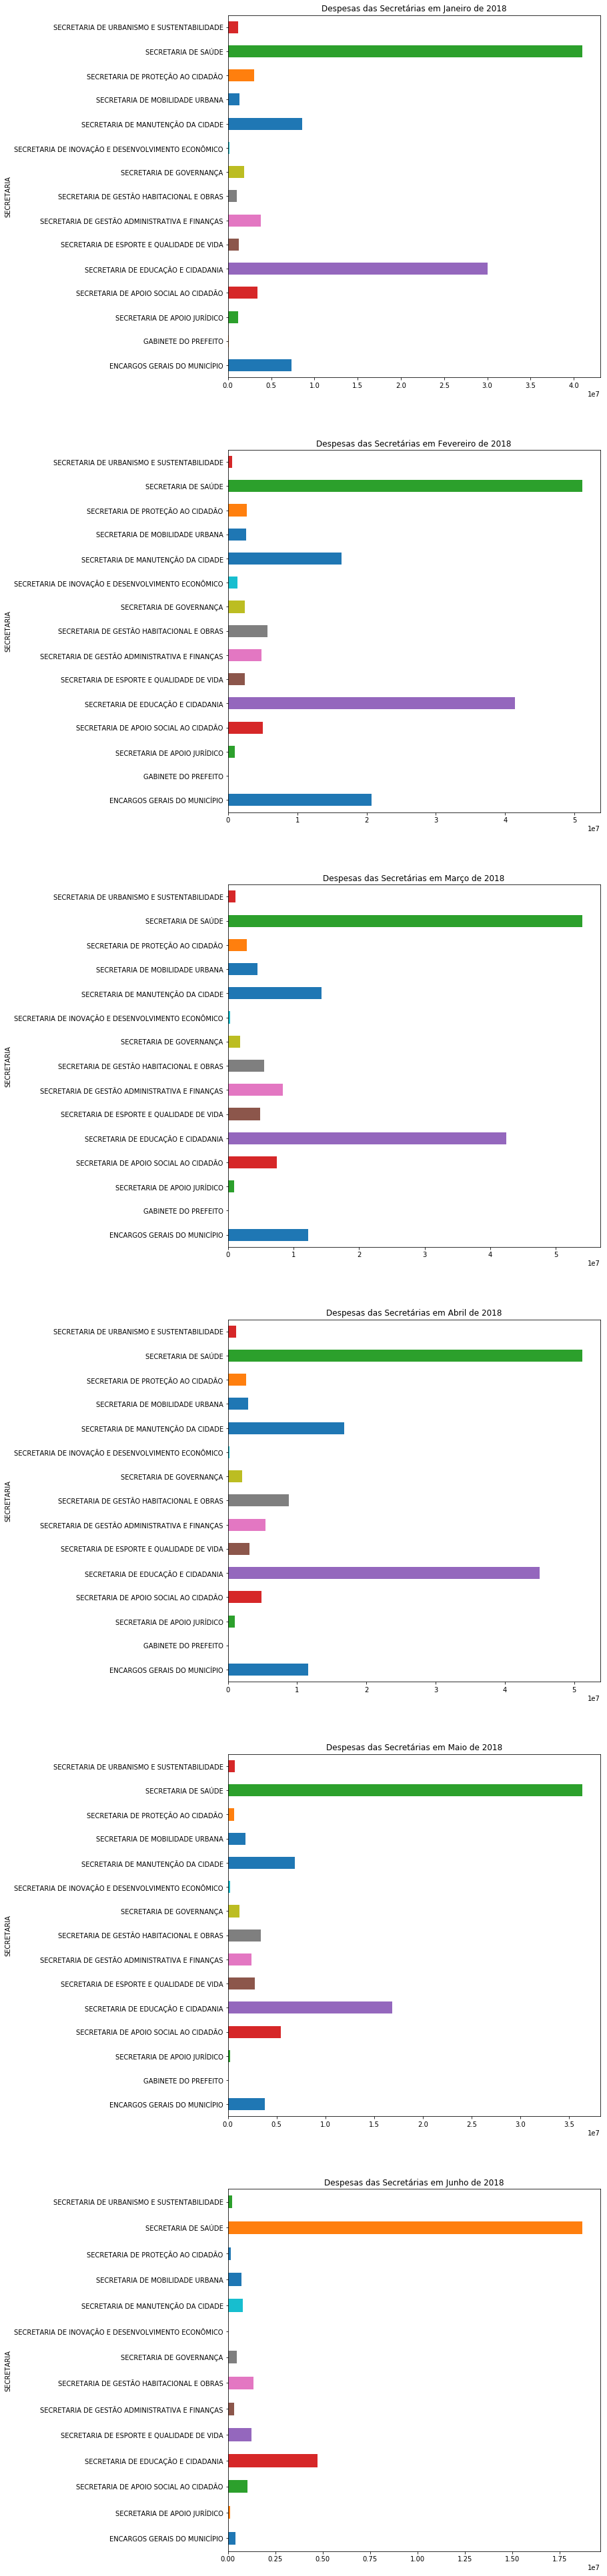

In [22]:
ps2018 = primeiro_semestre_2018.groupby(['MES','SECRETARIA']).apply(lambda x: round(x['PAGO(R$)'].sum(),1))
ps2018
fig, axes = plt.subplots(nrows=6, ncols=1)
mes = 'Janeiro Fevereiro Março Abril Maio Junho'.split()
for x in range(6):
    ps2018[x+1].plot.barh(ax = axes[x],figsize=(10,70),
                        title=(f'Despesas das Secretárias em {mes[x]} de 2018'))

<h5>B. Analise das Despesas das Secretárias: Função</h5>
<p>No gráfico abaixo mostra as Secretária em quais Funções são gastos em reais.
Desta forma fica mais fácil identificar onde estão os maiores valores pagos pelas Secretárias.</p>

Text(0,0.5,'\nSecretária/ Função')

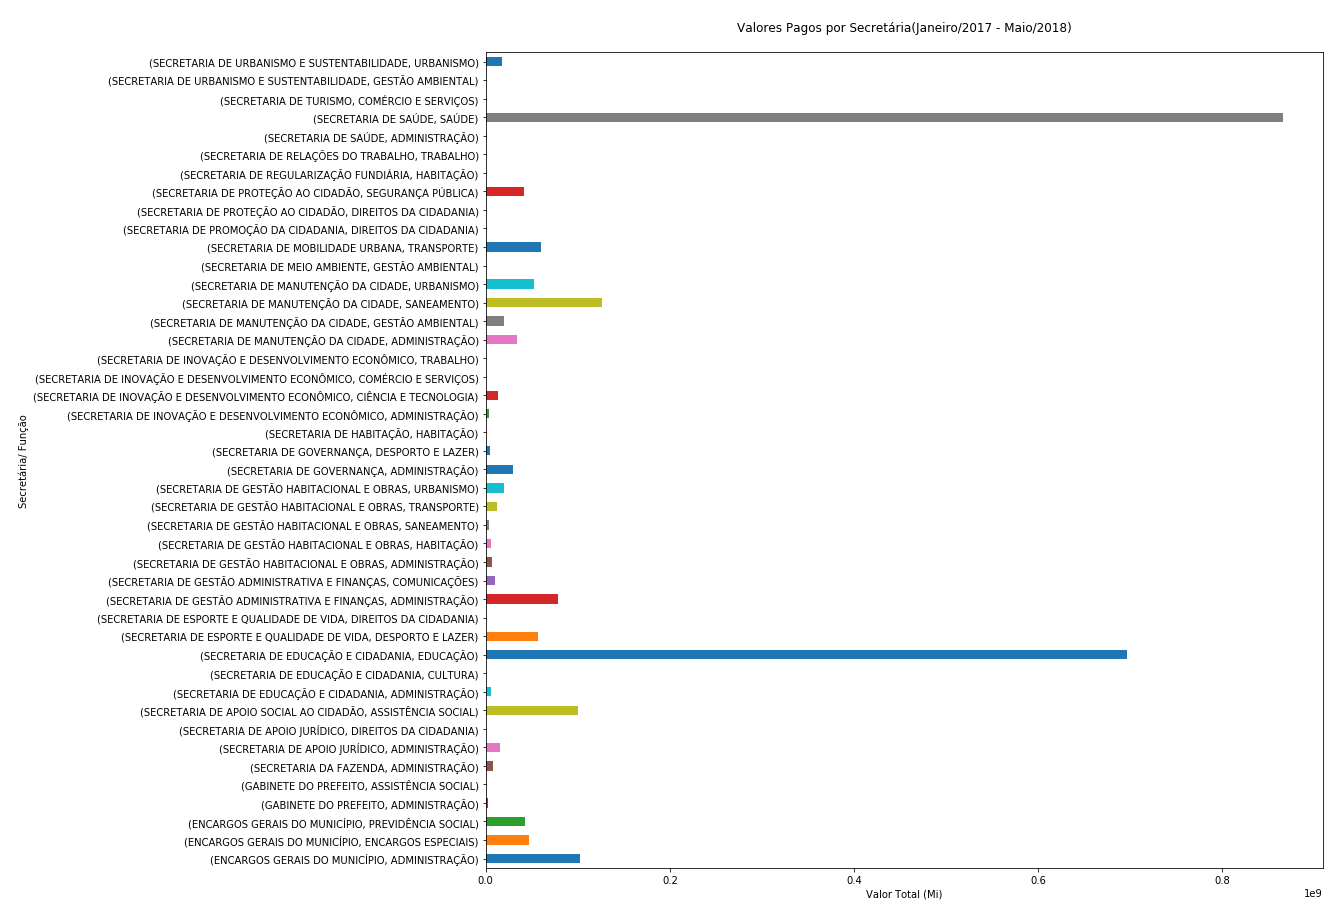

In [23]:
sec_fun = total.groupby(['SECRETARIA','FUNCAO']).apply(lambda x: round(x['PAGO(R$)'].sum(),1))
fig, axes = plt.subplots()  
sec_fun.plot.barh(ax = axes, figsize=(15,15),
                        title=('\nValores Pagos por Secretária(Janeiro/2017 - Maio/2018)\n'))
plt.xlabel('Valor Total (Mi)')
plt.ylabel('\nSecretária/ Função')

<h5>C. Analise das Despesas das Secretarias: Natureza</h5>
<p>Analisando as naturezas dos gasto de cada secretária.</p>

In [24]:
num_sec_nat=total.groupby(['SECRETARIA']).apply(lambda x: x['NATUREZADADESPESA'].value_counts())
num_sec_nat

SECRETARIA                                                                                                       
ENCARGOS GERAIS DO MUNICÍPIO                PRINCIPAL DA DÍVIDA CONTRATUAL RESGATADA                                 54
                                            SENTENÇAS JUDICIAIS                                                      38
                                            JUROS SOBRE A DÍVIDA POR CONTRATO                                        38
                                            INDENIZAÇÕES E RESTITUIÇÕES                                              37
                                            OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA                           36
                                            OBRIGAÇÕES PATRONAIS                                                     21
                                            INDENIZAÇÕES E RESTITUIÇÕES TRABALHISTAS                                 18
                                            OU

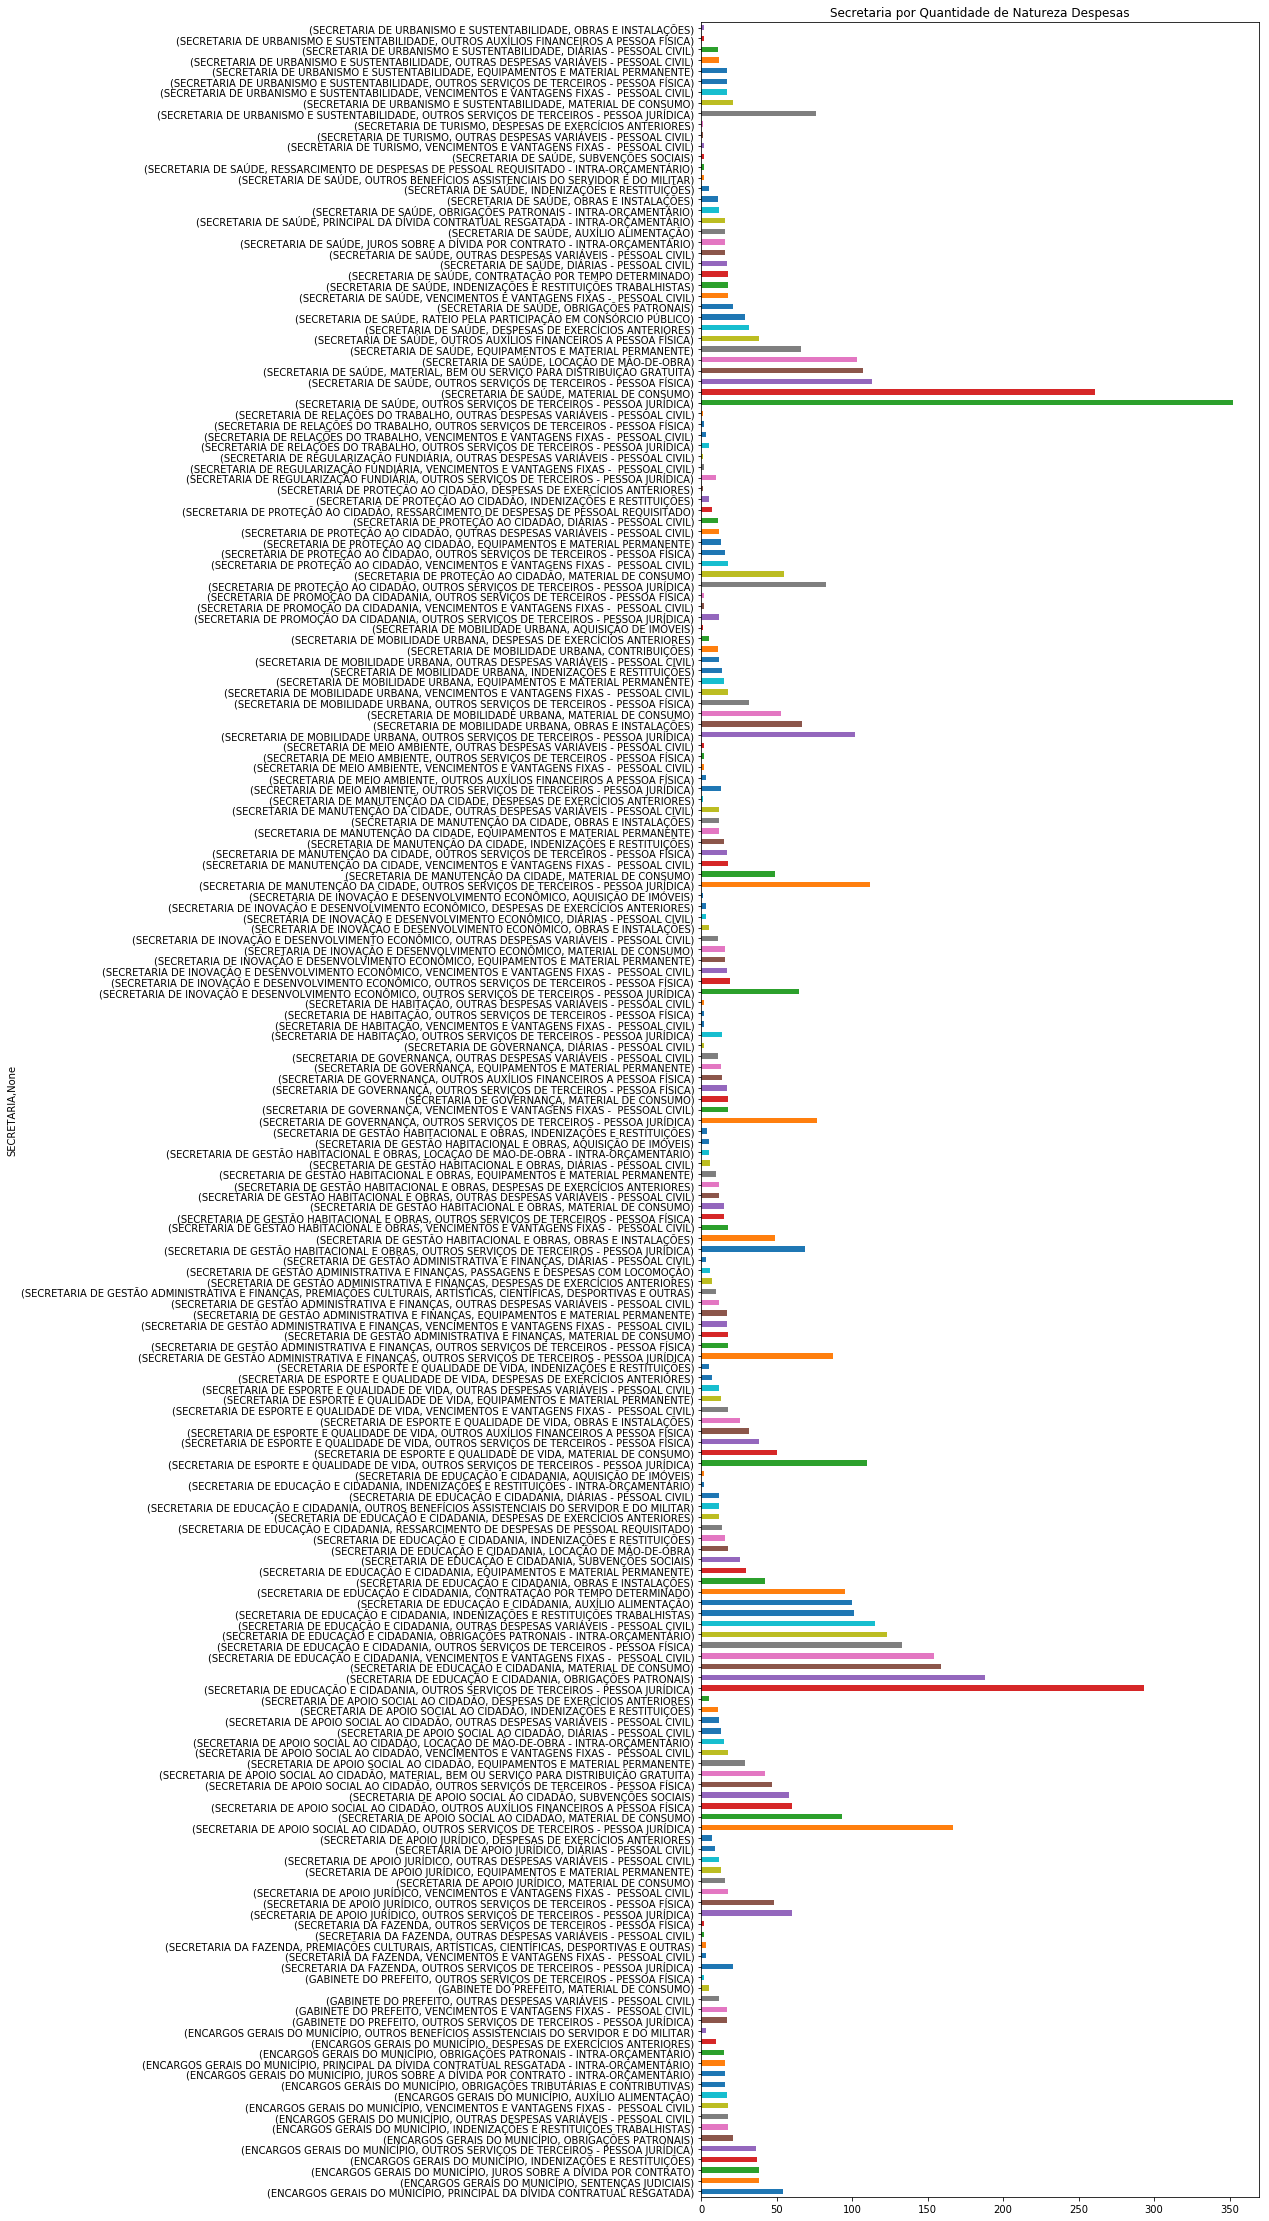

In [25]:
fig, axes = plt.subplots()
num_sec_nat.plot.barh(ax = axes,figsize=(10,40),title=(f'Secretaria por Quantidade de Natureza Despesas'))
plt.show()


<h5>D. Analise das Secretarias: Recursos</h5>
<p>Abaixo agrupei as Secretárias e valores máximos Fontes dos Recursos, para verificar qual Secretária está recebendo mais recursos. Com o gráfico é possível verificar que a Secretaria da Educação e Cidadania e Secretaria da Saúde que recebem mais recursos da Prefeitura de São José dos Campos.</p>

SECRETARIA
ENCARGOS GERAIS DO MUNICÍPIO                           371
GABINETE DO PREFEITO                                    53
SECRETARIA DA FAZENDA                                   31
SECRETARIA DE APOIO JURÍDICO                           183
SECRETARIA DE APOIO SOCIAL AO CIDADÃO                  570
SECRETARIA DE EDUCAÇÃO E CIDADANIA                    1647
SECRETARIA DE ESPORTE E QUALIDADE DE VIDA              311
SECRETARIA DE GESTÃO ADMINISTRATIVA E FINANÇAS         195
SECRETARIA DE GESTÃO HABITACIONAL E OBRAS              220
SECRETARIA DE GOVERNANÇA                               170
SECRETARIA DE HABITAÇÃO                                 20
SECRETARIA DE INOVAÇÃO E DESENVOLVIMENTO ECONÔMICO     156
SECRETARIA DE MANUTENÇÃO DA CIDADE                     248
SECRETARIA DE MEIO AMBIENTE                             22
SECRETARIA DE MOBILIDADE URBANA                        330
SECRETARIA DE PROMOÇÃO DA CIDADANIA                     16
SECRETARIA DE PROTEÇÃO AO CIDADÃO            

Text(0,0.5,'Secretária')

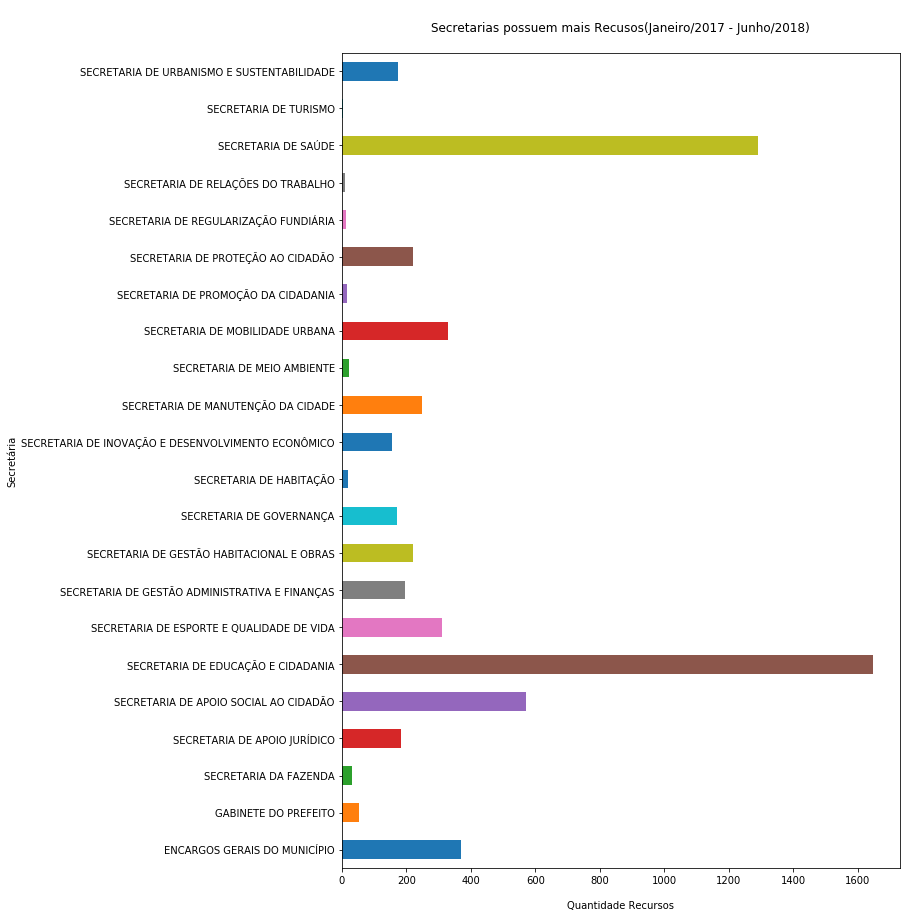

In [26]:
num_sec_rec=total.groupby(['SECRETARIA']).apply(lambda x: x['FONTEDERECURSO'].count().max())
print(num_sec_rec)
fig, axes = plt.subplots()  
num_sec_rec.plot.barh(ax = axes, figsize=(10,15),
                        title=('\nSecretarias possuem mais Recusos(Janeiro/2017 - Junho/2018)\n'))
plt.xlabel('\nQuantidade Recursos')
plt.ylabel('Secretária')

<p>Agrupei novamente as Secretárias com os valores das Fontes dos Recurso e criei um gráfico para facilita a visualização, o Tesouro mais uma vez se mostra o que é a principal fonte de recurso para  as Secretárias.</p>

In [27]:
num_sec_rec1=total.groupby(['SECRETARIA']).apply(lambda x: x['FONTEDERECURSO'].value_counts())
print(num_sec_rec1)

SECRETARIA                                                                                                                
ENCARGOS GERAIS DO MUNICÍPIO                        TESOURO                                                                    371
GABINETE DO PREFEITO                                TESOURO                                                                     53
SECRETARIA DA FAZENDA                               TESOURO                                                                     31
SECRETARIA DE APOIO JURÍDICO                        TESOURO                                                                    151
                                                    TRANSFERENCIAS E CONVENIOS ESTADUAIS - VINCULADOS                           32
SECRETARIA DE APOIO SOCIAL AO CIDADÃO               TESOURO                                                                    383
                                                    TRANSFERENCIAS E CONVENIOS FEDERAIS - V

Text(0,0.5,'Secretária, Fonte do Recurso')

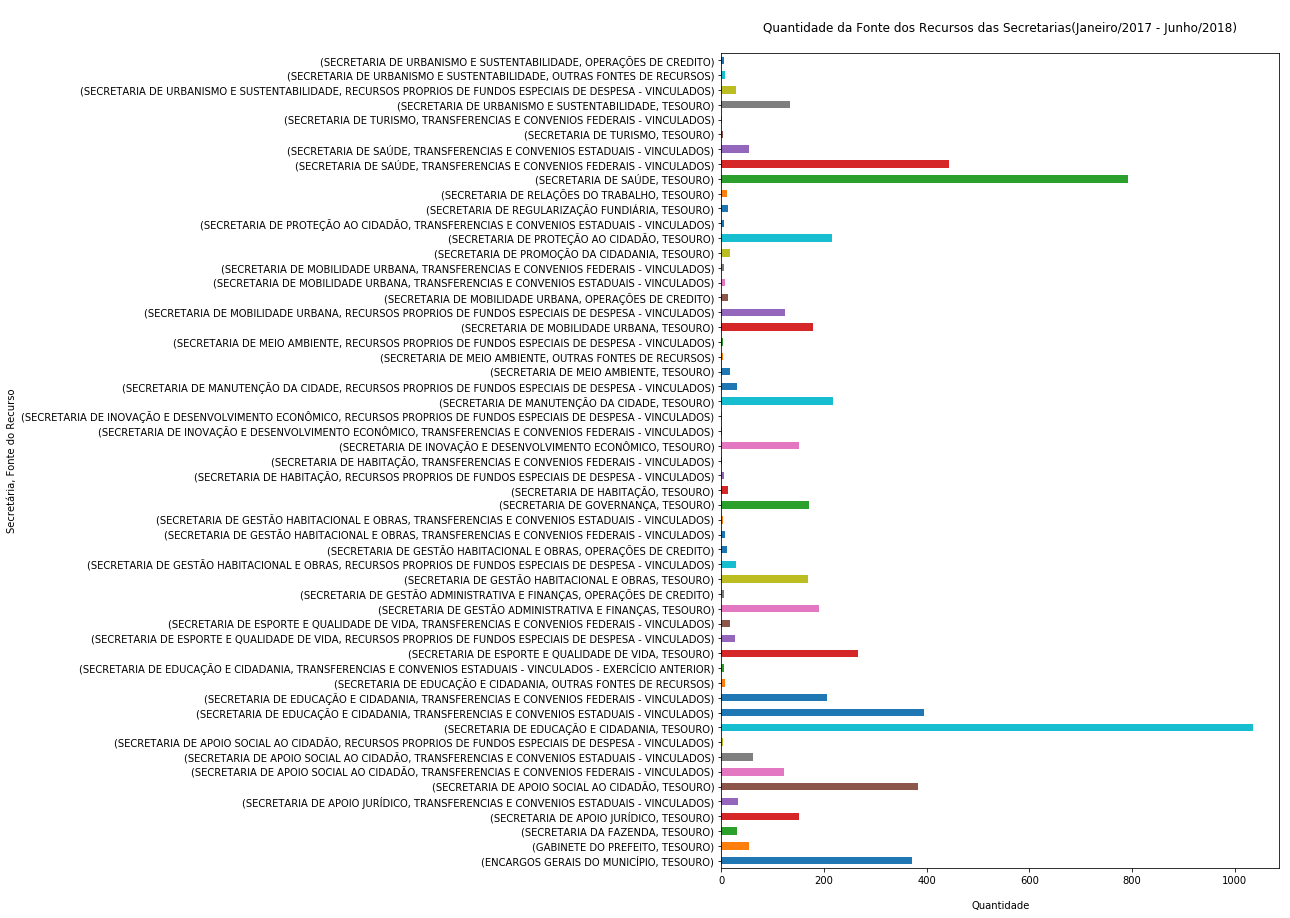

In [28]:
fig, axes = plt.subplots()  
num_sec_rec1.plot.barh(ax = axes, figsize=(10,15),
                        title=('\nQuantidade da Fonte dos Recursos das Secretarias(Janeiro/2017 - Junho/2018)\n'))
plt.xlabel('\nQuantidade')
plt.ylabel('Secretária, Fonte do Recurso')

<p>No gráfico abaixo mostra as os valores em reais que cada Secretrária pagou com cada Fonte de Recurso.</p>

Text(0,0.5,'Secretária, Fonte do Recurso')

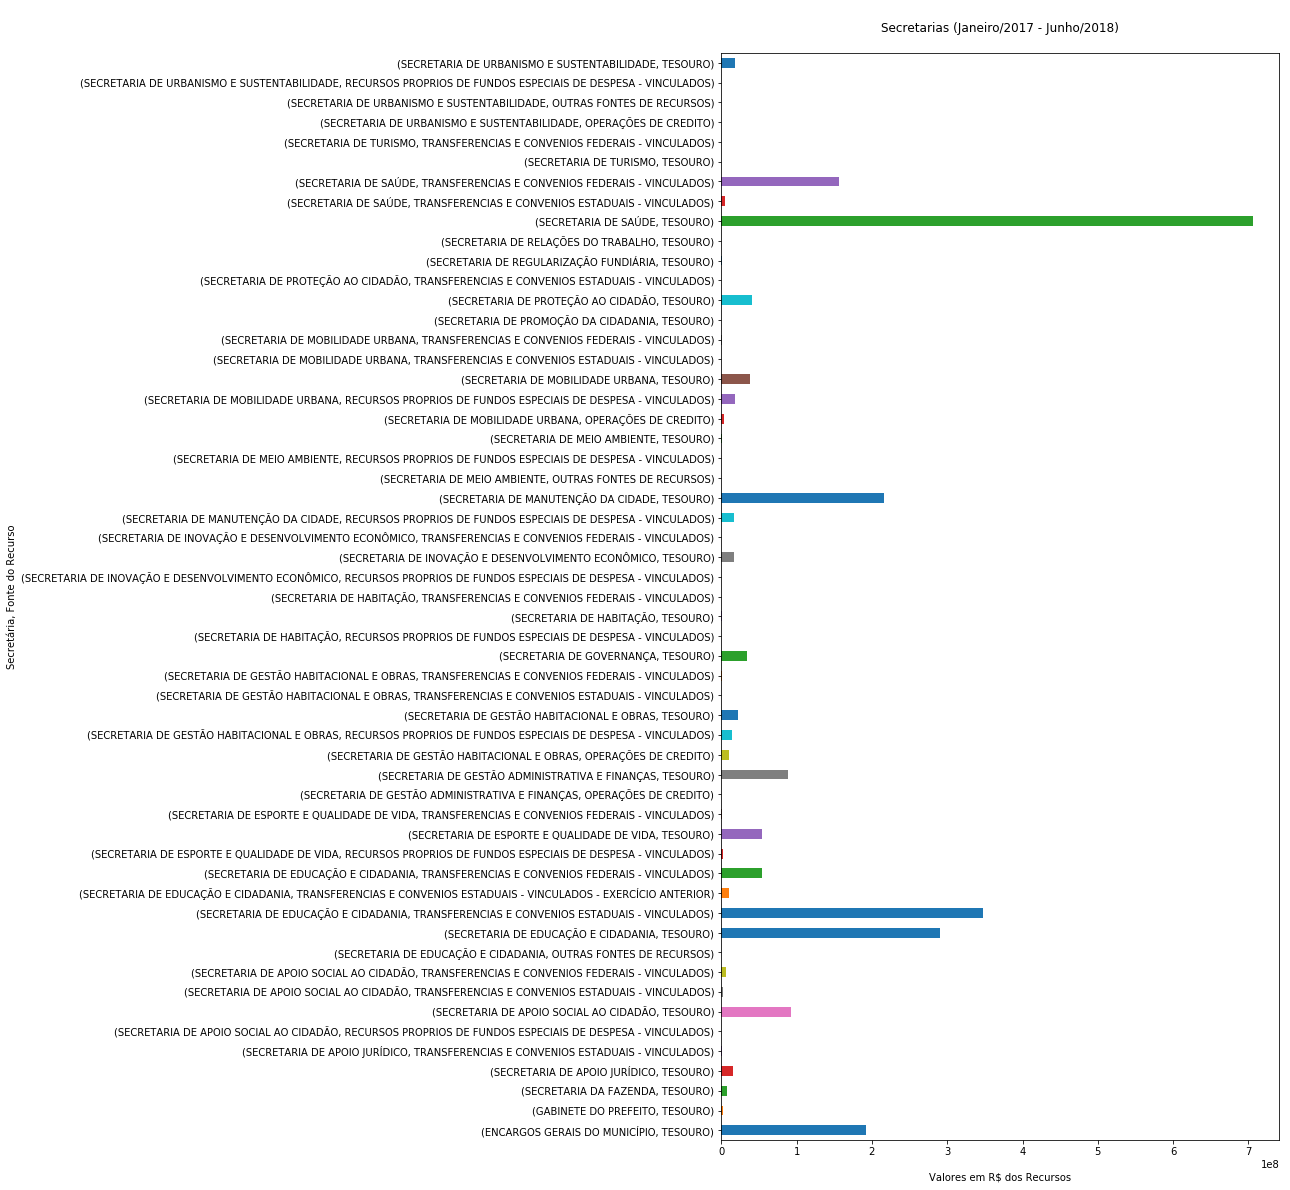

In [29]:
num_rec_pag=total.groupby(['SECRETARIA','FONTEDERECURSO']).apply(lambda x: round(x['PAGO(R$)'].sum(),1))
fig, axes = plt.subplots()  
num_rec_pag.plot.barh(ax = axes, figsize=(10,20),
                        title=('\nSecretarias (Janeiro/2017 - Junho/2018)\n'))
plt.xlabel('\nValores em R$ dos Recursos')
plt.ylabel('Secretária, Fonte do Recurso')

<h5>E. Analise das Despesas das Secretarias: SubFunção</h5>
<p>Abaixo agrupei as Secretarias e a Função com a soma das SubFunção para verificar mais profundamente, quais são subfunções são mais recorrentes nos gastos da Prefeitura de São José dos Campos.
</p>

In [30]:
num_sec_sub=total.groupby(['SECRETARIA','FUNCAO']).apply(lambda x: x['SUBFUNCAO'].value_counts())
print(num_sec_sub)

SECRETARIA                                          FUNCAO                                                          
ENCARGOS GERAIS DO MUNICÍPIO                        ADMINISTRAÇÃO          ADMINISTRAÇÃO GERAL                          211
                                                    ENCARGOS ESPECIAIS     SERVIÇO DA DÍVIDA INTERNA                    124
                                                    PREVIDÊNCIA SOCIAL     PREVIDÊNCIA BÁSICA                            36
GABINETE DO PREFEITO                                ADMINISTRAÇÃO          ADMINISTRAÇÃO GERAL                           51
                                                    ASSISTÊNCIA SOCIAL     ASSISTÊNCIA COMUNITÁRIA                        2
SECRETARIA DA FAZENDA                               ADMINISTRAÇÃO          ADMINISTRAÇÃO GERAL                           31
SECRETARIA DE APOIO JURÍDICO                        ADMINISTRAÇÃO          ADMINISTRAÇÃO GERAL                          151
               

Text(0,0.5,'Secretária, Função, Subfunção')

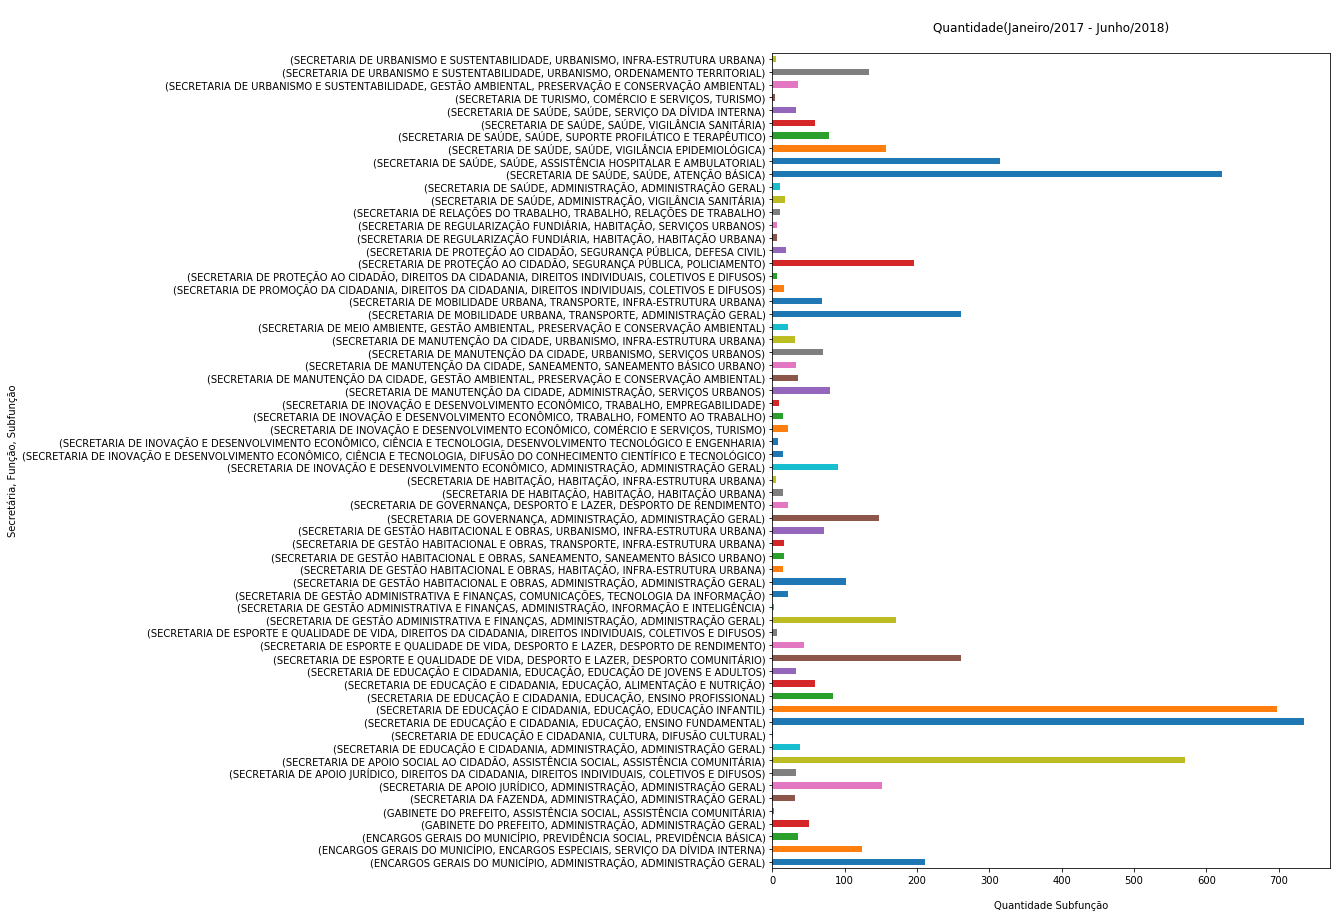

In [31]:
fig, axes = plt.subplots()  
num_sec_sub.plot.barh(ax = axes, figsize=(10,15),
                        title=('\nQuantidade(Janeiro/2017 - Junho/2018)\n'))
plt.xlabel('\nQuantidade Subfunção')
plt.ylabel('Secretária, Função, Subfunção')

<p> Com este gráfico foi possível encontrar quais são os subgrupos dos maiores gastos estão alocados.<br>
    Os valores mais evidentes do gráficos são: <ul> 
        <li>Assistência Hospitalar e Ambulatorial, Atenção Básica - <b>Secretária da Sáude;</b></li> 
        <li>Ensino Fundamental e Infantil - <b>Secretária de Educação e Cidadania;</b></li> 
        <li>Saneamento Básico Urbano - <b>Secretária de Manutenção da Cidade</b></li> 
    </ul>
</p>

Text(0,0.5,'Secretária, Subfunção')

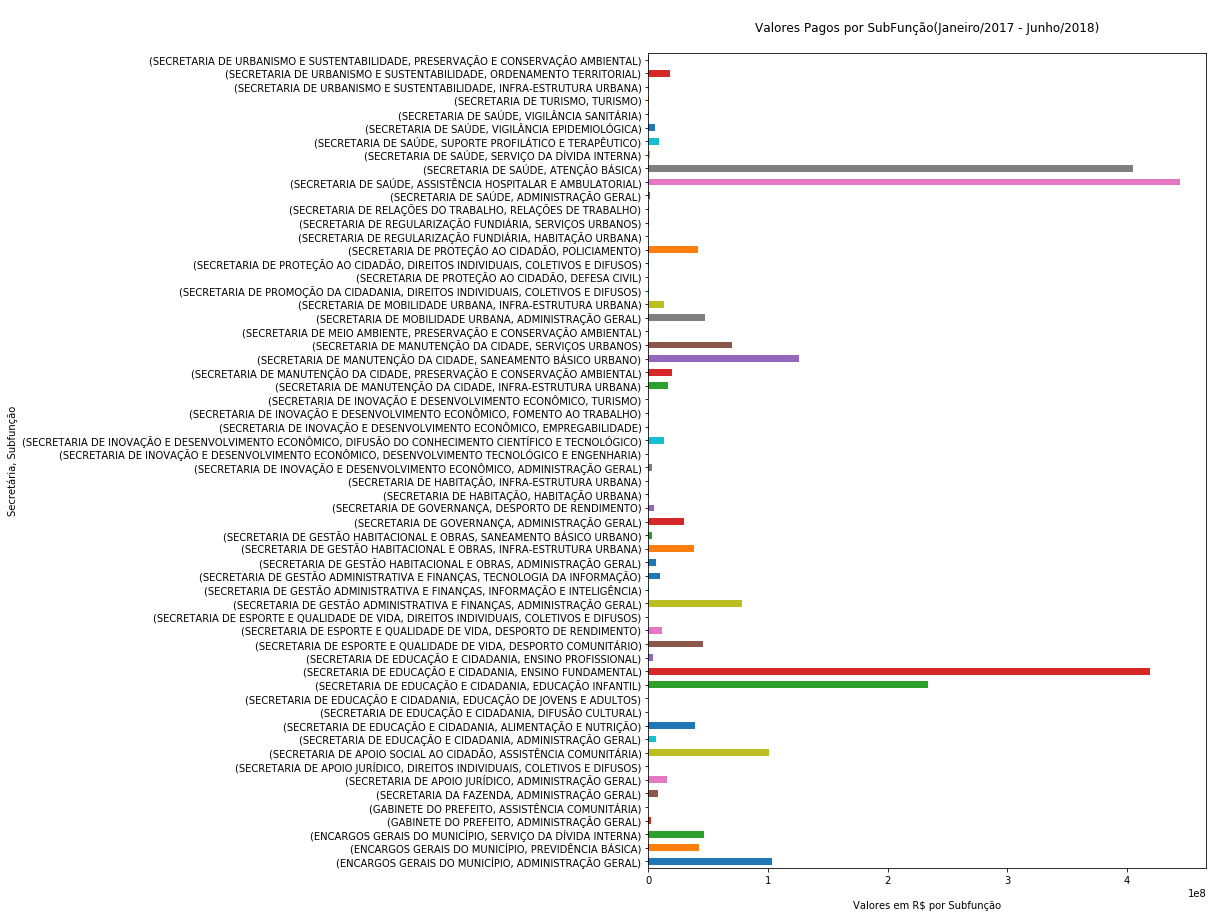

In [32]:
sec_sub_pag=total.groupby(['SECRETARIA','SUBFUNCAO']).apply(lambda x: round(x['PAGO(R$)'].sum(),1))
fig, axes = plt.subplots()  
sec_sub_pag.plot.barh(ax = axes, figsize=(10,15),
                        title=('\nValores Pagos por SubFunção(Janeiro/2017 - Junho/2018)\n'))
plt.xlabel('\nValores em R$ por Subfunção')
plt.ylabel('Secretária, Subfunção')